In [1]:
#importa los datasets de sklearn
#Autor Víctor Viera B.
from sklearn import datasets
#importo bibliotecas de datos
import pandas as pd
#importo biblioteca de vectores y matrices
import numpy as np

In [2]:
#se cargan el dataset de digitos
digits = datasets.load_digits()
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [4]:
#pixeles que conforman los datos
print(digits.feature_names)

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


In [5]:
#la forma de los datos
digits.data.shape

(1797, 64)

In [6]:
#variable dependiente
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [7]:
#datos de una imagen
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [86]:
# Binarizar las etiquetas
y = digits.target
y_bin = label_binarize(y, classes=classes)
n_classes = y_bin.shape[1]


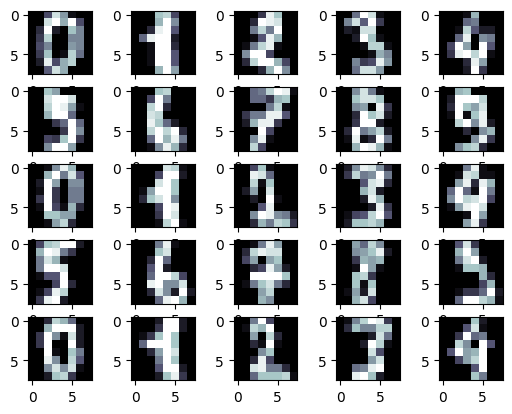

In [8]:
#se imprimen 5 x 5 datos
#grafica los números
import matplotlib.pyplot as plt
fig, ax = plt.subplots(5, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='bone')

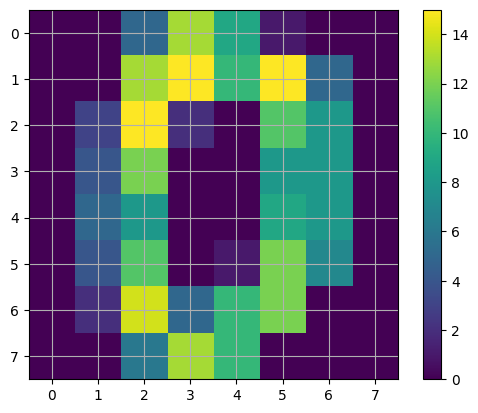

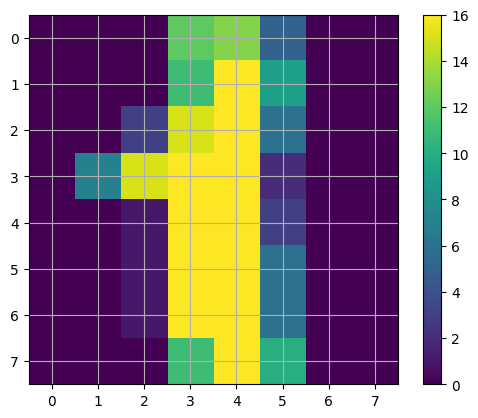

In [9]:
#se visualizan 2 dígitos
plt.figure()
for i in range(0,2):
  plt.imshow(digits.images[i])
  plt.colorbar()
  plt.grid(True)
  plt.show()

In [10]:
#se dividen los datos en prueba y entrenamiento
from sklearn.model_selection import train_test_split
train, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, stratify=digits.target, random_state=42)

In [11]:
#se llama al modelo de Knn
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=11)


In [14]:
#se asignan la variables X y
X= train
y= ytrain

In [16]:
# se entrena el modelo
neigh.fit(X, y)

KNeighborsClassifier(n_neighbors=11)

In [17]:
# se realiza la predicción con los datos de entrenamiento
ypred=neigh.predict(train)

In [18]:
#se pinta la matriz de confusión
from sklearn.metrics import confusion_matrix,classification_report
mx=confusion_matrix(ytrain,ypred)
mx

array([[133,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 136,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   1, 131,   0,   0,   0,   0,   1,   0,   0],
       [  0,   0,   0, 136,   0,   0,   0,   1,   0,   0],
       [  0,   1,   0,   0, 132,   0,   0,   3,   0,   0],
       [  0,   0,   0,   0,   1, 133,   1,   0,   0,   1],
       [  0,   0,   0,   0,   0,   0, 136,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 134,   0,   0],
       [  0,   5,   0,   1,   0,   0,   0,   0, 125,   0],
       [  0,   0,   0,   1,   0,   2,   0,   0,   1, 131]])

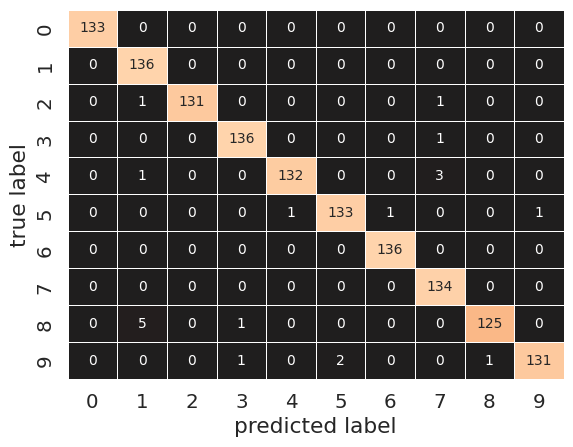

In [19]:
#Graficamos la matriz de confusión
#para graficar datos
import matplotlib.pyplot as plt
import seaborn as sn
sn.set(font_scale=1.3) # for label size
#mx=datos(matrix de confusión)
#annot=True si se escribe del dato en cada celda
#annot_kws= datos en cada celda y tamaño de la fuente
#fmt= formato del tipo de dato (f(float),g(general),d(decimal))
#cbar barras a la derecha de la matriz
#center tiene que ver con el color (100)
sn.heatmap(mx, annot=True, annot_kws={"size": 10},fmt='g',center=0,linewidths=0.5,cbar=False) # font size
plt.ylabel('true label')
plt.xlabel('predicted label');

plt.show()

In [20]:
#se imprine el classification report
print(classification_report(ytrain, ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       133
           1       0.95      1.00      0.97       136
           2       1.00      0.98      0.99       133
           3       0.99      0.99      0.99       137
           4       0.99      0.97      0.98       136
           5       0.99      0.98      0.98       136
           6       0.99      1.00      1.00       136
           7       0.96      1.00      0.98       134
           8       0.99      0.95      0.97       131
           9       0.99      0.97      0.98       135

    accuracy                           0.99      1347
   macro avg       0.99      0.99      0.99      1347
weighted avg       0.99      0.99      0.99      1347



In [73]:
#se realiza la predicción con los datos de prueba
ypredTest=neigh.predict(Xtest)
y_score=neigh.predict_proba(Xtest)

In [22]:
# se calcula la matriz de confusión
mx2=confusion_matrix(ytest, ypredTest)
mx2

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 46,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 44,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 46,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 45,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 45,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 44,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  4,  0,  1,  0,  0,  0,  1, 37,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  1, 43]])

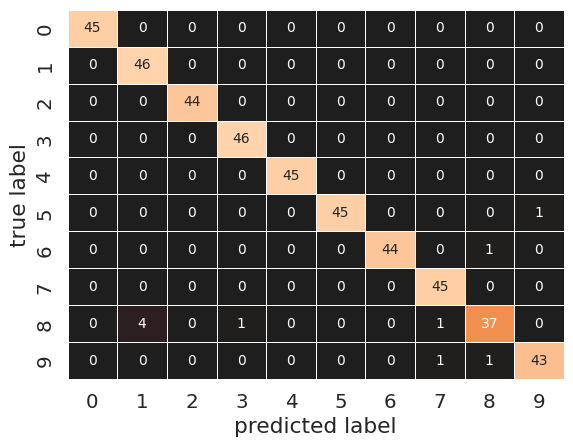

In [23]:
#Graficamos la matriz de confusión prueba
#para graficar datos
import matplotlib.pyplot as plt
import seaborn as sn
sn.set(font_scale=1.3) # for label size
#mx=datos(matrix de confusión)
#annot=True si se escribe del dato en cada celda
#annot_kws= datos en cada celda y tamaño de la fuente
#fmt= formato del tipo de dato (f(float),g(general),d(decimal))
#cbar barras a la derecha de la matriz
#center tiene que ver con el color (100)
sn.heatmap(mx2, annot=True, annot_kws={"size": 10},fmt='g',center=0,linewidths=0.5,cbar=False) # font size
plt.ylabel('true label')
plt.xlabel('predicted label');

plt.show()

In [24]:
print(classification_report(ytest, ypredTest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.92      1.00      0.96        46
           2       1.00      1.00      1.00        44
           3       0.98      1.00      0.99        46
           4       1.00      1.00      1.00        45
           5       1.00      0.98      0.99        46
           6       1.00      0.98      0.99        45
           7       0.96      1.00      0.98        45
           8       0.95      0.86      0.90        43
           9       0.98      0.96      0.97        45

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



In [68]:
#imágenes de8x8, la imagen No 300
digits.images[300].shape

(8, 8)

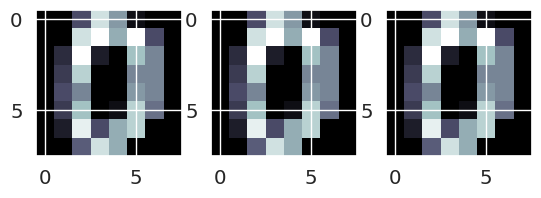

In [ ]:
#se imprime la imagen
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 3)
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[0], cmap='bone')

In [25]:
#se realiza la predicción de un dato nuevo
ypredNumero=neigh.predict([digits.data[3]])
ypredNumero

array([3])

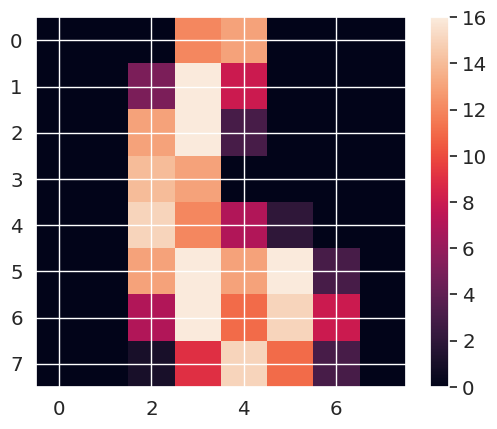

In [29]:
#se imprime el dato nuevo
plt.figure()
plt.imshow(digits.images[6])
plt.colorbar()
plt.grid(True)
plt.show()

In [78]:
fpr = dict()
tpr = dict()
roc_auc = dict()

In [92]:
X = digits.data

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.3, stratify=y, random_state=42)

In [105]:
for i in range(digits.images[300].shape[0]):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[i][:, 1])
    roc_auc[i] = auc(fpr[i], tpr[i])

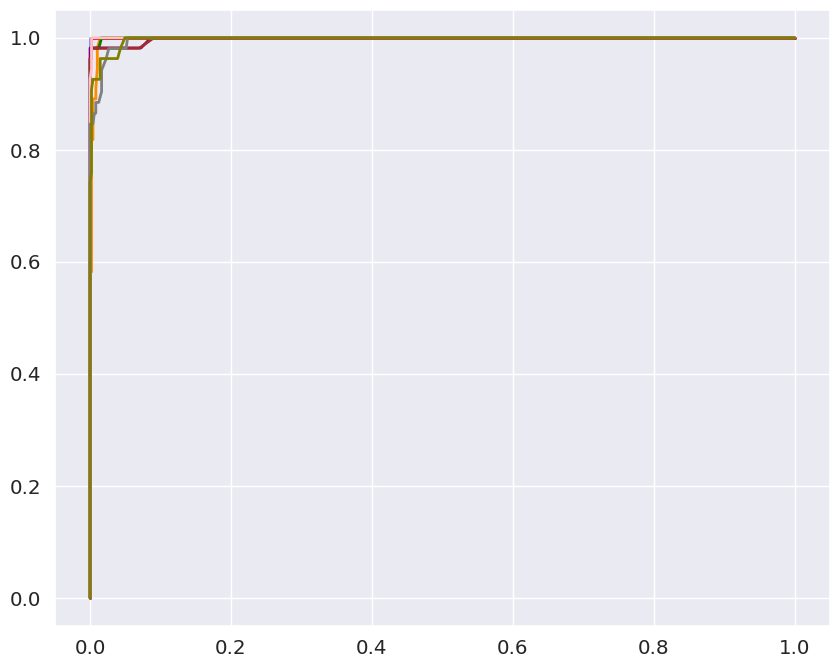

In [103]:
# Dibujar todas las curvas ROC
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple', 'brown', 'pink', 'gray', 'olive'])

plt.figure(figsize=(10, 8))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='Clase {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))
